In [2]:
%pylab inline

pathchow='/home/jfm343/Documents/mean_field_grant/SC_triplet'


pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Lattice
import Hamiltonian
from scipy import linalg as la
import seaborn as sns



rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data

In [4]:



        
frames=[]

path=pathy+'/data/musweep_21_4_2022-07-14-01-12-24'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)



['musweep_21_4_0', 'musweep_21_4_0.6', 'musweep_21_4_1.4', 'musweep_21_4_1', 'musweep_21_4_1.8', 'musweep_21_4_1.6', 'musweep_21_4_1.2', 'musweep_21_4_0.4', 'musweep_21_4_0.2', 'musweep_21_4_0.8', 'inforun']


In [5]:
df

,T,mu,J,D,phi,theta,MZ,FSC0,FSC,FAFM0,FAFM
0,0.010000,0.0,4.0,0.133266,0.001340,0.047613,0.000105,-723.093970,-723.093970,-716.404646,-716.404645
1,0.012857,0.0,4.0,0.133166,0.000414,0.029496,0.000095,-723.093967,-723.093967,-716.456055,-716.456054
2,0.015714,0.0,4.0,0.133367,0.000857,0.011308,0.000105,-723.093967,-723.093967,-716.526904,-716.526901
3,0.018571,0.0,4.0,0.133324,0.003809,0.004023,0.000095,-723.094049,-723.094049,-716.619316,-716.619314
4,0.021429,0.0,4.0,0.133124,0.003198,0.001776,0.000105,-723.094389,-723.094389,-716.735296,-716.735293
...,...,...,...,...,...,...,...,...,...,...,...
45,0.138571,0.8,4.0,0.000144,6.916589,3.144572,0.000095,-1407.751446,-1407.751446,-1655.513703,-1655.513689
46,0.141429,0.8,4.0,0.000056,6.916589,3.019572,0.000105,-1407.780264,-1407.780264,-1656.090613,-1656.090596
47,0.144286,0.8,4.0,0.000144,6.916589,3.019572,0.000095,-1407.811912,-1407.811912,-1656.680198,-1656.680183
48,0.147143,0.8,4.0,0.000056,6.916589,3.019572,0.000105,-1407.846634,-1407.846634,-1657.282490,-1657.282473


# Scaling of the free energy with system size

['musweep_61_4_0.8', 'musweep_61_4_0.4', 'musweep_61_4_0.2', 'musweep_61_4_1.4', 'musweep_61_4_1.8', 'musweep_61_4_0.6', 'musweep_61_4_1.6', 'musweep_61_4_1.2', 'musweep_61_4_1', 'musweep_61_4_0', 'inforun']


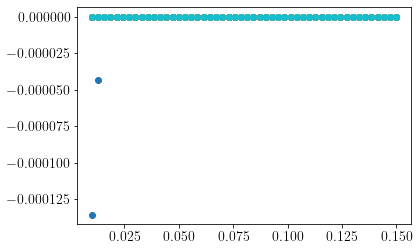

In [6]:
        
frames=[]

path=pathy+'/data/musweep_61_4_2022-07-14-01-17-47'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)

df_one=df.loc[(df['mu'] == 1.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,(d2-d3)/(61**2))
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.arange(0,2,0.2)
for mm in mus:
    draw_heatmap( 'T', 'FAFM', 'FAFM0', data=df.loc[(df['mu'] == mm)])
# draw_heatmap( 'T', 'MZ', 'J', data=df_one)
plt.show()

['musweep_21_4_0', 'musweep_21_4_0.6', 'musweep_21_4_1.4', 'musweep_21_4_1', 'musweep_21_4_1.8', 'musweep_21_4_1.6', 'musweep_21_4_1.2', 'musweep_21_4_0.4', 'musweep_21_4_0.2', 'musweep_21_4_0.8', 'inforun']


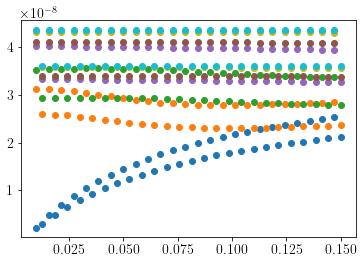

In [7]:
        
frames=[]

path=pathy+'/data/musweep_21_4_2022-07-14-01-12-24'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)

df_one=df.loc[(df['mu'] == 1.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,(d2-d3)/(21**2))
    # plt.plot(d1,d2, c=d3[0])

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.arange(0,2,0.2)
for mm in mus:
    draw_heatmap( 'T', 'FAFM', 'FAFM0', data=df.loc[(df['mu'] == mm)])
# draw_heatmap( 'T', 'MZ', 'J', data=df_one)
plt.show()

# For J=6

['musweep_extended_61_6_0.8', 'musweep_extended_61_6_0.2', 'musweep_extended_61_6_1', 'musweep_extended_61_6_1.8', 'musweep_extended_61_6_0.4', 'musweep_extended_61_6_0.6', 'musweep_extended_61_6_0', 'musweep_extended_61_6_1.4', 'musweep_extended_61_6_1.2', 'musweep_extended_61_6_1.6', 'inforun']


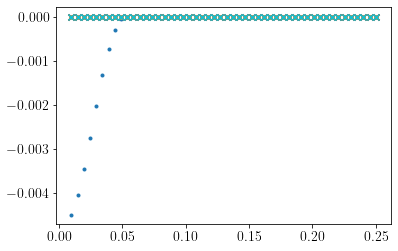

In [8]:


        
frames=[]

path=pathy+'/data/musweep_extended_61_6_2022-07-14-01-30-43'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)

df_one=df.loc[(df['mu'] == 1.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,(d2-d3)/(61**2), marker=args[3])
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.arange(0,2,0.2)
for mm in mus:
    draw_heatmap( 'T', 'FAFM', 'FAFM0', '.', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'FSC', 'FSC0', 'x', data=df.loc[(df['mu'] == mm)])
plt.show()

['musweep_extended_31_6_0.6', 'musweep_extended_31_6_0', 'musweep_extended_31_6_0.8', 'musweep_extended_31_6_1.8', 'musweep_extended_31_6_1.2', 'musweep_extended_31_6_1.6', 'musweep_extended_31_6_0.2', 'musweep_extended_31_6_1', 'musweep_extended_31_6_0.4', 'musweep_extended_31_6_1.4', 'inforun']


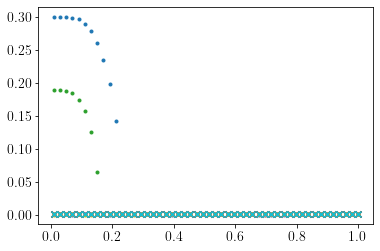

In [10]:


        
frames=[]

path=pathy+'/data/musweep_extended_31_6_2022-07-14-02-07-10'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)

df_one=df.loc[(df['mu'] == 1.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3])
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.arange(0,2,0.2)
for mm in mus:
    draw_heatmap( 'T', 'D', 'mu','.', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'MZ', 'J','x', data=df_one)
plt.show()

['musweep_extended_31_6_0.6', 'musweep_extended_31_6_0', 'musweep_extended_31_6_0.8', 'musweep_extended_31_6_1.8', 'musweep_extended_31_6_1.2', 'musweep_extended_31_6_1.6', 'musweep_extended_31_6_0.2', 'musweep_extended_31_6_1', 'musweep_extended_31_6_0.4', 'musweep_extended_31_6_1.4', 'inforun']


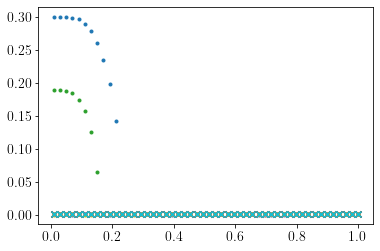

In [11]:



        
frames=[]

path=pathy+'/data/musweep_extended_31_6_2022-07-14-02-07-10'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)

df_one=df.loc[(df['mu'] == 1.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3])
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.arange(0,2,0.2)
for mm in mus:
    draw_heatmap( 'T', 'D', 'mu','.', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'MZ', 'J','x', data=df_one)
plt.show()